# ベイズ推論による学習と予測
## 線型回帰の例
### モデル
尤度関数を
$$
y_n = w^T \phi(x_n) + \epsilon_n\ ,\ \epsilon_n \sim \mathcal{N}(0, \beta^{-1})
$$
事前分布を
$$
p(w) = \mathcal{N}(w|0, \alpha^{-1}I)
$$

具体的に基底関数を$[\phi(x)]_j = x^j$とする．基底関数ベクトルの次元を$M=4$として，具体的にサンプリングを行う．

In [12]:
import numpy as np
from numpy.random import * # 乱数の発生に必要

In [13]:
M = 4

まずは，図3.6に習って無情報（データが一切ない場合）におけるデータ空間上での曲線を引きましょう．

In [23]:
alpha = 1
mu = np.zeros(M)
sigma = np.eye(M) * alpha
# 事前分布からのサンプリング
np.random.seed(0)
omega = multivariate_normal(mu, sigma, 5)
print(omega)

[[ 1.76405235  0.40015721  0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788  0.95008842 -0.15135721]
 [-0.10321885  0.4105985   0.14404357  1.45427351]
 [ 0.76103773  0.12167502  0.44386323  0.33367433]
 [ 1.49407907 -0.20515826  0.3130677  -0.85409574]]


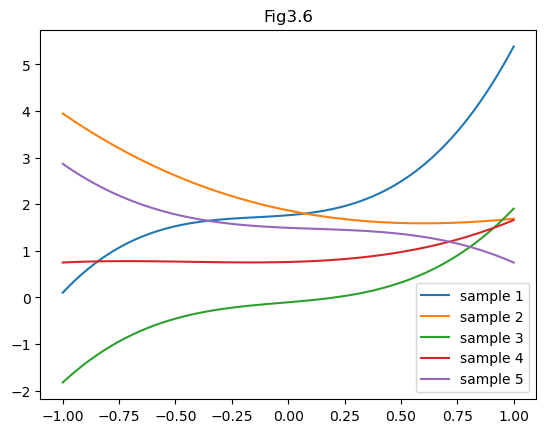

In [28]:
# 取得したパラメータから曲線を描画
import matplotlib.pyplot as plt
x = np.linspace(-1, 1, 100)
for i in range(5):
    y = omega[i,0] + omega[i,1]*x + omega[i,2]*x**2 + omega[i,3]*x**3
    plt.plot(x, y, label='sample {}'.format(i+1))
plt.title('Fig3.6')
plt.legend()
plt.show()

次は図3.7に習って，生成した5つ目のパラメータを用いその曲線沿いに誤差を加えてデータの生成をしましょう．

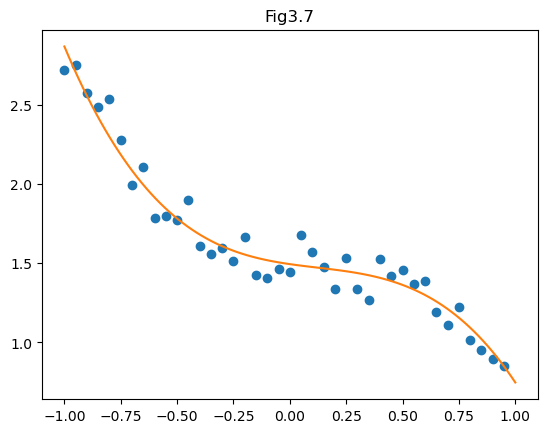

In [32]:
w = omega[4]
data = np.arange(-1, 1, 0.05)
error = np.random.normal(0, 0.1, len(data))
t = w[0] + w[1]*data + w[2]*data**2 + w[3]*data**3 + error
plt.plot(data, t, 'o')
plt.plot(x, w[0] + w[1]*x + w[2]*x**2 + w[3]*x**3)
plt.title('Fig3.7')
plt.show()